In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')
testdata=pd.read_csv('test.csv')

In [3]:
data.head()
testdata.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.2500,0.0938,0.6562,10.8555,9.2514,9.8774,90.0014,89.9985,90.0003
1,2,12,80.0,0.0000,0.9062,0.0938,24.8969,6.2215,5.9731,90.0002,103.9295,90.0001
2,3,12,80.0,0.3438,0.3438,0.3125,24.4819,6.2462,6.1270,89.9998,104.6466,90.0001
3,4,206,80.0,0.4062,0.3750,0.2188,9.4274,9.4271,9.4271,90.0032,90.0034,89.9967
4,5,33,80.0,0.5938,0.0625,0.3438,10.3481,8.8522,9.4810,90.0037,90.0010,90.0007


In [4]:
data.isnull().sum()
testdata.isnull().sum()

id                            0
spacegroup                    0
number_of_total_atoms         0
percent_atom_al               0
percent_atom_ga               0
percent_atom_in               0
lattice_vector_1_ang          0
lattice_vector_2_ang          0
lattice_vector_3_ang          0
lattice_angle_alpha_degree    0
lattice_angle_beta_degree     0
lattice_angle_gamma_degree    0
dtype: int64

In [5]:
data['number_of_total_atoms'].unique()

array([80., 40., 30., 20., 60., 10.])

In [6]:
data['number_of_total_atoms'] = data['number_of_total_atoms'].map({10: 0,20:1,30:2,40:3,60:4,80:5})
testdata['number_of_total_atoms'] = testdata['number_of_total_atoms'].map({10: 0,20:1,30:2,40:3,60:4,80:5})

In [7]:
data['spacegroup'].unique()

array([ 33, 194, 227, 167, 206,  12], dtype=int64)

In [8]:
data['spacegroup'] = data['spacegroup'].map({12: 0,33:1,167:2,194:3,206:4,227:5})
testdata['spacegroup'] = testdata['spacegroup'].map({12: 0,33:1,167:2,194:3,206:4,227:5})

In [9]:
data.drop(['id'],axis=1,inplace=True)
sub = pd.DataFrame()
sub['id'] = testdata['id']
testdata.drop(['id'],axis=1,inplace=True)

In [10]:
data.head(1)
testdata.head(1)

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,5,0.25,0.0938,0.6562,10.8555,9.2514,9.8774,90.0014,89.9985,90.0003


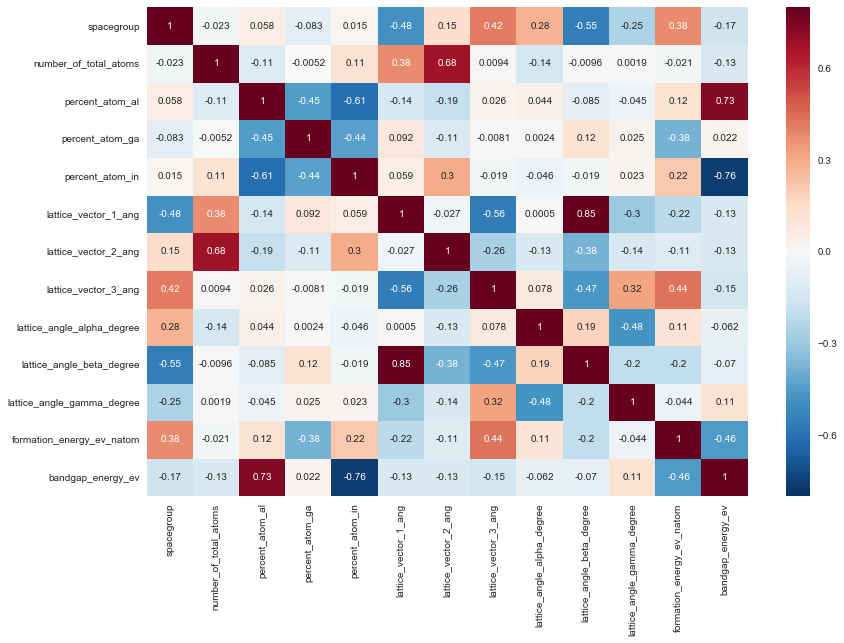

In [11]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

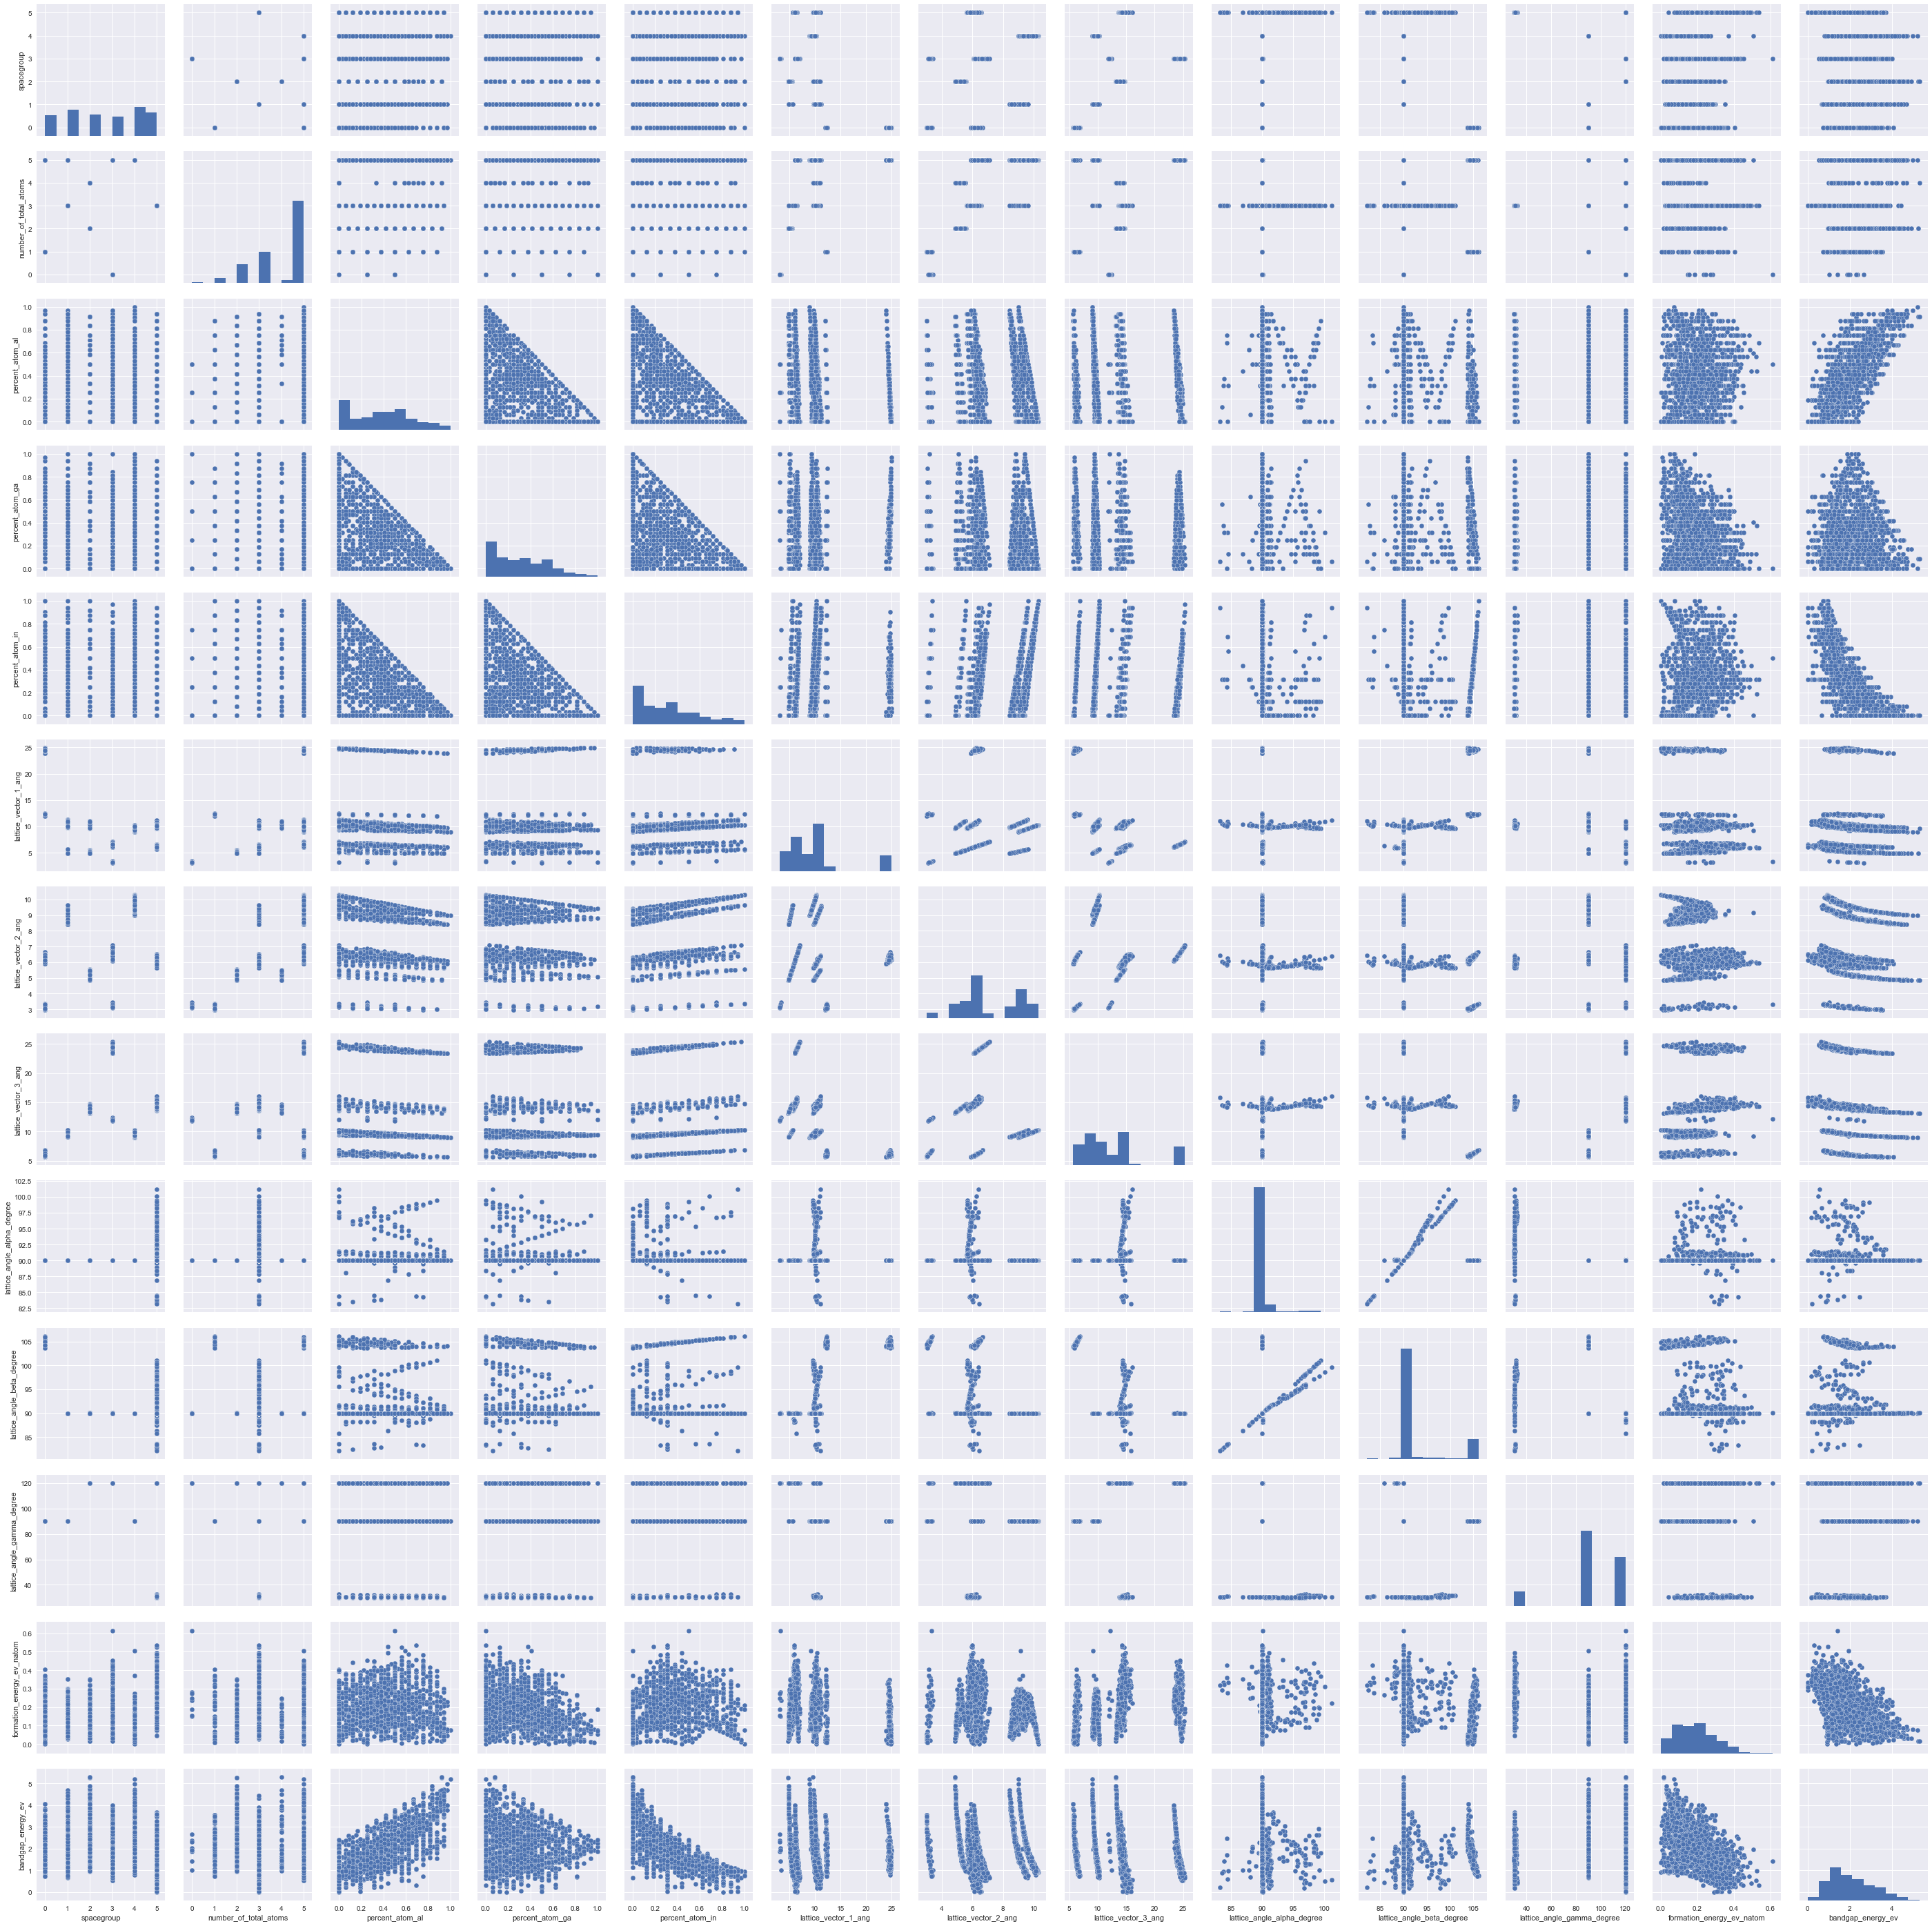

In [12]:
sns.set()
cols = ['spacegroup', 'number_of_total_atoms', 'percent_atom_al','percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang','lattice_vector_2_ang', 'lattice_vector_3_ang','lattice_angle_alpha_degree', 'lattice_angle_beta_degree','lattice_angle_gamma_degree', 'formation_energy_ev_natom','bandgap_energy_ev']
sns.pairplot(data[cols], size = 3)
plt.show();

In [13]:
from sklearn.linear_model import LinearRegression,RidgeCV,ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb

In [14]:
target1=data['formation_energy_ev_natom']
target2=data['bandgap_energy_ev']

In [15]:
train1,test1=train_test_split(data,test_size=0.3)
train_X1=train1[train1.columns[:-2]]
#print(train_X1.columns)
train_Y1=train1[train1.columns[-2:-1]]
print(train_Y1.columns)#formation
test_X1=test1[test1.columns[:-2]]
test_Y1=test1[test1.columns[-2:-1]]
X1=data[data.columns[:-2]]
Y1=target1
#-------------------------------------------------------------------------------------------
train2,test2=train_test_split(data,test_size=0.3)
train_X2=train2[train2.columns[:-2]]
train_Y2=train2[train2.columns[-1:]]
print(train_Y2.columns)#bandgap
test_X2=test2[test2.columns[:-2]]
test_Y2=test2[test2.columns[-1:]]
X2=data[data.columns[:-2]]
Y2=target2

Index([u'formation_energy_ev_natom'], dtype='object')
Index([u'bandgap_energy_ev'], dtype='object')


In [16]:
n_folds = 5
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train1.values)
    rmse = np.sqrt(-cross_val_score(model,train_X1,train_Y1,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train1.values)
    rmse = np.sqrt(-cross_val_score(model,test_X1,test_Y1,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_train2(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train2.values)
    rmse = np.sqrt(-cross_val_score(model,train_X2,train_Y2,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test2(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train2.values)
    rmse = np.sqrt(-cross_val_score(model,test_X2,test_Y2,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [17]:
train_pre=[None for _ in range(8)]
test_pre=[None for _ in range(8)]
train_pre2=[None for _ in range(8)]
test_pre2=[None for _ in range(8)]

In [18]:
lr = LinearRegression()
lr.fit(train_X1,train_Y1)
test_pre[0] = rmse_CV_test(lr).mean()
train_pre[0] = rmse_CV_test(lr).std()
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on test',rmse_CV_test(lr).mean())

lr2 = LinearRegression()
lr2.fit(train_X2,train_Y2)
test_pre2[0] = rmse_CV_train2(lr2).mean()
train_pre2[0] = rmse_CV_train2(lr2).std()
print('rmse on train',rmse_CV_train2(lr2).mean())
print('rmse on test',rmse_CV_test2(lr2).mean())

('rmse on train', 0.08004770825864248)
('rmse on test', 0.08012531271701509)
('rmse on train', 0.43707726921126255)
('rmse on test', 0.46356822928477337)


ValueError: x and y must be the same size

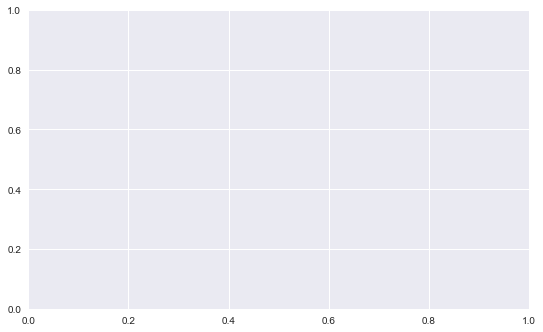

In [19]:
plt.scatter(train_pre[0], train_pre[0] - train_Y1, c = "blue",  label = "Training data")
plt.scatter(test_pre[0],test_pre[0] - test_Y1, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 0.4, color = "red")
plt.show()

ValueError: x and y must be the same size

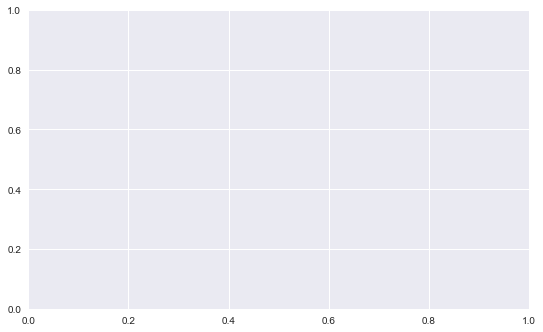

In [20]:
plt.scatter(train_pre[0], train_Y1, c = "blue",  label = "Training data")
plt.scatter(test_pre[0], test_Y1, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0,0.6], [0,0.7], c = "red")
plt.show()

In [21]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(train_X1,train_Y1)
alpha = ridge.alpha_
print('best alpha',alpha)
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(train_X1, train_Y1)
print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
test_pre[1] = rmse_CV_test(ridge).mean()
train_pre[1] = rmse_CV_test(ridge).std()



ridge2 = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge2.fit(train_X2,train_Y2)
alpha = ridge2.alpha_
print('best alpha',alpha)
print("Try again for more precision with alphas centered around " + str(alpha))
ridge2 = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge2.fit(train_X2, train_Y2)
print("Ridge RMSE on Training set :", rmse_CV_train2(ridge2).mean())
print("Ridge RMSE on Test set :", rmse_CV_test2(ridge2).mean())
test_pre2[1] = rmse_CV_train2(ridge2).mean()
train_pre2[1] = rmse_CV_train2(ridge2).std()

('best alpha', 1.0)
Try again for more precision with alphas centered around 1.0
('Ridge RMSE on Training set :', 0.08015008018462119)
('Ridge RMSE on Test set :', 0.08038310826011343)
('best alpha', 0.3)
Try again for more precision with alphas centered around 0.3
('Ridge RMSE on Training set :', 0.43714409452717706)
('Ridge RMSE on Test set :', 0.4652006066677917)


In [ ]:
# Plot residuals
plt.scatter(train_pre[1], train_pre[1] - train_Y1, c = "blue",  label = "Training data")
plt.scatter(test_pre[0], test_pre[0] - test_Y1, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
plt.scatter(train_pre[1], train_Y1, c = "blue",  label = "Training data")
plt.scatter(test_pre[1], test_Y1, c = "black",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot( c = "red")
plt.show()

In [22]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(train_X1,train_Y1)
test_pre[2] = rmse_CV_train(lasso).mean()
train_pre[2] = rmse_CV_train(lasso).std()
print('rmse on train',rmse_CV_train(lasso).mean())
print('rmse on test',rmse_CV_test(lasso).mean())

lasso2 = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso2.fit(train_X2,train_Y2)
test_pre2[2] = rmse_CV_train2(lasso2).mean()
train_pre2[2] = rmse_CV_train2(lasso2).std()
print('rmse on train',rmse_CV_train2(lasso2).mean())
print('rmse on test',rmse_CV_test2(lasso2).mean())
#print("Lasso RMSE on Training set :", rmse_CV_train(lasso).mean())
#print("Lasso RMSE on Test set :", rmse_CV_test(lasso).mean())
#score = rmse_cv(lasso)
#print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

('rmse on train', 0.0801267720479812)
('rmse on test', 0.08028427919997372)
('rmse on train', 0.4368119999432885)
('rmse on test', 0.4645379575373908)


In [23]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(train_X1,train_Y1)
print("ENet RMSE on Training set :", rmse_CV_train(ENet).mean())
print("ENet RMSE on Test set :", rmse_CV_test(ENet).mean())
test_pre[3] = rmse_CV_train(ENet).mean()
train_pre[3] = rmse_CV_train(ENet).std()


ENet2 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet2.fit(train_X2,train_Y2)
test_pre2[3] = rmse_CV_train2(ENet2).mean()
train_pre2[3] = rmse_CV_train(ENet2).std()
print("ENet RMSE on Training set :", rmse_CV_train2(ENet2).mean())
print("ENet RMSE on Test set :", rmse_CV_test2(ENet2).mean())

('ENet RMSE on Training set :', 0.08012322050434438)
('ENet RMSE on Test set :', 0.0802842597642826)
('ENet RMSE on Training set :', 0.4368463365095809)
('ENet RMSE on Test set :', 0.4645769400974122)


In [24]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(train_X1,train_Y1)
test_pre[4] = rmse_CV_train(KRR).mean()
train_pre[4] = rmse_CV_train(KRR).std()
print("KRR RMSE on Training set :", rmse_CV_train(KRR).mean())
print("KRR RMSE on Test set :", rmse_CV_test(KRR).mean())

KRR2 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR2.fit(train_X2,train_Y2)
test_pre2[4] = rmse_CV_train2(KRR2).mean()
train_pre2[4] = rmse_CV_train2(KRR2).std()
print("KRR RMSE on Training set :", rmse_CV_train2(KRR2).mean())
print("KRR RMSE on Test set :", rmse_CV_test2(KRR2).mean())

('KRR RMSE on Training set :', 0.055048601335785)
('KRR RMSE on Test set :', 0.07917184507424854)
('KRR RMSE on Training set :', 0.26913541259627954)
('KRR RMSE on Test set :', 0.3023401650103929)


In [25]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(train_X1,train_Y1)
test_pre[5] = rmse_CV_train(GBoost).mean()
train_pre[5] = rmse_CV_train(GBoost).std()
print("GBoost RMSE on Training set :", rmse_CV_train(GBoost).mean())
print("GBoost RMSE on Test set :", rmse_CV_test(GBoost).mean())

GBoost2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost2.fit(train_X2,train_Y2)
test_pre2[5] = rmse_CV_train2(GBoost2).mean()
train_pre2[5] = rmse_CV_train2(GBoost2).std()
print("GBoost RMSE on Training set :", rmse_CV_train2(GBoost2).mean())
print("GBoost RMSE on Test set :", rmse_CV_test2(GBoost2).mean())

('GBoost RMSE on Training set :', 0.04389694789424548)
('GBoost RMSE on Test set :', 0.043727661275528615)
('GBoost RMSE on Training set :', 0.24247682394074926)
('GBoost RMSE on Test set :', 0.26813204796759627)


In [26]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, nthread = -1)
model_xgb.fit(train_X1,train_Y1)
test_pre[6] = rmse_CV_train(model_xgb).mean()
train_pre[6] = rmse_CV_train(model_xgb).std()
print("XGBoost RMSE on Training set :", rmse_CV_train(model_xgb).mean())
print("XGBoost RMSE on Test set :", rmse_CV_test(model_xgb).mean())

model_xgb2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, nthread = -1)
model_xgb2.fit(train_X2,train_Y2)
test_pre2[6] = rmse_CV_train2(model_xgb2).mean()
train_pre2[6] = rmse_CV_train2(model_xgb2).std()
print("XGBoost RMSE on Training set :", rmse_CV_train2(model_xgb2).mean())
print("XGBoost RMSE on Test set :", rmse_CV_test2(model_xgb2).mean())

('XGBoost RMSE on Training set :', 0.048877077841896224)
('XGBoost RMSE on Test set :', 0.05460696597614455)
('XGBoost RMSE on Training set :', 0.2362411978210534)
('XGBoost RMSE on Test set :', 0.2577050476905633)


In [27]:
#----------------------------------------------------------------------------------------------------
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [28]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, model_xgb,lasso))
averaged_models.fit(train_X1,train_Y1)
test_pre[7] = rmse_CV_train(averaged_models).mean()
train_pre[7] = rmse_CV_test(averaged_models).std()
print("Ridge RMSE on Training set :", rmse_CV_train(averaged_models).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(averaged_models).mean())


averaged_models2 = AveragingModels(models = (ENet, GBoost, KRR, model_xgb,lasso))
averaged_models2.fit(train_X2,train_Y2)
test_pre2[7] = rmse_CV_train2(averaged_models2).mean()
train_pre2[7] = rmse_CV_train2(averaged_models2).std()
print("Ridge RMSE on Training set :", rmse_CV_train2(averaged_models2).mean())
print("Ridge RMSE on Test set :", rmse_CV_test2(averaged_models2).mean())

('Ridge RMSE on Training set :', 0.054579683851056535)
('Ridge RMSE on Test set :', 0.05896529387985221)
('Ridge RMSE on Training set :', 0.2758575672225689)
('Ridge RMSE on Test set :', 0.29946012790728693)


In [30]:
classifiers=['Linear Regression','Ridge Regression','Lasso Regression','Kernel Ridge Regression','Elastic Net Regression','Gradient Boosting','XGBoost', 'Averaging Models']
new_models_dataframe2=pd.DataFrame({'CV Mean':test_pre,'Std':train_pre},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Regression,0.080125,0.006789
Ridge Regression,0.080383,0.007312
Lasso Regression,0.080127,0.001054
Kernel Ridge Regression,0.080123,0.001050
Elastic Net Regression,0.055049,0.002059
Gradient Boosting,0.043897,0.004217
XGBoost,0.048877,0.002607
Averaging Models,0.054580,0.001658


In [31]:
new_models_dataframe2=pd.DataFrame({'CV Mean':test_pre2,'Std':train_pre2},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Regression,0.437077,0.010724
Ridge Regression,0.437144,0.010982
Lasso Regression,0.436812,0.011172
Kernel Ridge Regression,0.436846,0.001050
Elastic Net Regression,0.269135,0.016662
Gradient Boosting,0.242477,0.009324
XGBoost,0.236241,0.012923
Averaging Models,0.275858,0.011823


In [ ]:
#def rmsle(y, y_pred):
#    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
#a=train_Y1.values.tolist()
#print(len(train_pre[0]))
#print(len(a))
#for i in range(0,8):
#    print(rmsle(train_Y1, train_pre[i]))
#    print(rmsle(train_Y1, test_pre[i]))

In [22]:
#GBoost
predictest=GBoost.predict(testdata)
#print(predictest)

In [23]:
predictest2=GBoost2.predict(testdata)
#print(predictest2)
sub['formation_energy_ev_natom']=predictest
sub['bandgap_energy_ev']=predictest2
sub.to_csv('submission303.csv', encoding='utf-8')